## Tasks
Import the csv file from: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
1. Identify and handle the missing values: 1) Convert "?" to NaN, 
                                           2) Count missing values in each column 
                                           3) Deal with missing values:
                                                   * replace data with the column mean: 
                                                           a. "normalized-losses"
                                                           b. "stroke"
                                                           c. "bore"
                                                           d. "horsepower"
                                                           e. "peak-rpm"
                                                   * replace data by frequency or mode: 
                                                           a. "num-of-doors"
                                                   * Drop the entire row: 
                                                           a. "price"
2. Check and correct the data formats: 1) Check the data types
                                       2) Correct the data types: 
                                                   * "bore", "stroke" to float
                                                   * "normalized-losses" and "horsepower"to int
                                                   * "price" to float
                                                   * "peak-rpm" to float
3. Data Standardization: 1) Transform "city-mpg" to "city-L/100km" 
                         2) Transform "highway-mpg" to "highway-L/100km"
4. Data Normalization: 1) Scale the data in by performing "Simple feature Scaling":
                                * "length"
                                * "width"
                                * "height"
5. Binning: 
            1) plot histogram on "horsepower" column
            2) Bin "horsepower" into 3 equal bins (Low, Medium, High)
            3) Count the binned values using 'values_counts()' method
            4) Plot a bar diagram on the newly binned "horsepower" column with it's value.counts()
            5) Plot a histogram again on the newly binned "horsepower" column with bins = 3
6. Converting categorical variable into numerical variables: 
            1) Get dummy variables for "fuel-type" column, megre it to the data frame and drop the "fuel-type" column
            2) Get dummy variables for "aspiration" column, megre it to the data frame and drop the "aspiration" column
7. Save the new CSV file as "clean_df.csv" and use the 'df.head()' method to check the first 10 rows in the dataframe
                              
                       
                                                 


### Importing the libraries and the data:

In [26]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(url, names = headers)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### 1. Identify and handle the missing values:

#### 1) Converting "?" to NaN:

In [27]:
df.replace('?', np.nan, inplace = True)
#df.head(10)

#### 2) Count the missing values in each column

In [28]:
# Evaluating missing data: Methods are - 1) .isnull() and 2) .notnull()
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Using for loop in to easily count the number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#### 3) Deal with missing values

In [30]:
# Replace data with the column mean: a. "normalized-losses", b. "stroke", c. "bore", d. "horsepower", e. "peak_rpm"
for column in df[["normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"]]:
    
    columnseries = df[column]
    avg_column = df[column].astype('float').mean(axis=0)
    df[column].replace(np.nan, avg_column, inplace=True)
       
df[["normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"]].head()



,normalized-losses,stroke,bore,horsepower,peak-rpm
0,122,2.68,3.47,111,5000
1,122,2.68,3.47,111,5000
2,122,3.47,2.68,154,5000
3,164,3.40,3.19,102,5500
4,164,3.40,3.19,115,5500


In [31]:
# Replace data using mode: a. "num-of-doors"
print(df["num-of-doors"].value_counts())
print('Max value: ',df["num-of-doors"].value_counts().idxmax())

#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

four    114
two      89
Name: num-of-doors, dtype: int64
Max value:  four


In [32]:
# Drop the entire row: a. 'price'
# simply drop whole row with NaN in "price" column
df.dropna(subset = ["price"], axis = 0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

#checking the counts
df.count()


symboling            201
normalized-losses    201
make                 201
fuel-type            201
aspiration           201
num-of-doors         201
body-style           201
drive-wheels         201
engine-location      201
wheel-base           201
length               201
width                201
height               201
curb-weight          201
engine-type          201
num-of-cylinders     201
engine-size          201
fuel-system          201
bore                 201
stroke               201
compression-ratio    201
horsepower           201
peak-rpm             201
city-mpg             201
highway-mpg          201
price                201
dtype: int64

### 2. Check and correct the data formats:

#### 1) Check the data types

In [33]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [34]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Correct the data types

In [35]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype(float)
df[["normalized-losses", "horsepower"]] = df[["normalized-losses", "horsepower"]].astype(int)

In [36]:
# checking the data types again
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### 3. Data Standardization: [Transforming data into a common format]

#### 1) Transform "city-mpg" to "city-L/100km":

In [37]:
df[["city-mpg"]] = 235/df[["city-mpg"]]
df.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)

#### 2) Transform "highway-mpg" to "highway-L/100km":

In [38]:
df[["highway-mpg"]] = 235/df[["highway-mpg"]]
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)

In [39]:
# Checking the updated dataframe
print("Columns: ",df.columns)
df.head()

Columns:  Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price'],
      dtype='object')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


### 4. Data normalization:

#### 1. Scale the data by performing "Simple feature Scaling": 

In [40]:
# Convert the following columns: * lenght, * width, * height
for column in df[['length', 'width', 'height']]:
    
    columnseries = df[column]
    df[column] = columnseries.values/columnseries.values.max()
    
# Checking the normalized data:
df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning:

#### 1. Plot a histogram on "horsepower" column:

Text(0.5, 1.0, 'horsepower bins')

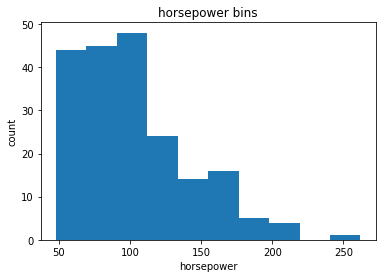

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### 2. Bin "horsepower" into 3 equal bins (Low, Medium, High)

In [42]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
group_names = ['low', 'medium', 'high']
df['horsepower_binned'] = pd.cut(df['horsepower'],bins, labels = group_names, include_lowest = True)
df['horsepower_binned'].head(10)

0       low
1       low
2    medium
3       low
4       low
5       low
6       low
7       low
8    medium
9       low
Name: horsepower_binned, dtype: category
Categories (3, object): [low < medium < high]

#### 3) Count the binned values using 'values_counts()' method

In [43]:
df["horsepower_binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower_binned, dtype: int64

#### 4) Plot a bar diagram on the newly binned "horsepower" column with it's value.counts()

Text(0.5, 1.0, 'horsepower bins')

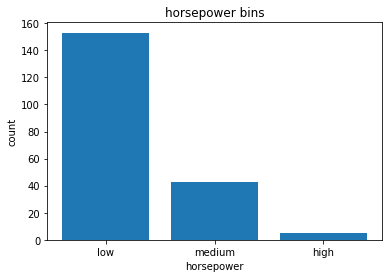

In [44]:
plt.bar(group_names, df["horsepower_binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### 5) Plot a histogram again on the newly binned "horsepower" column with bins = 3

Text(0.5, 1.0, 'horsepower bins')

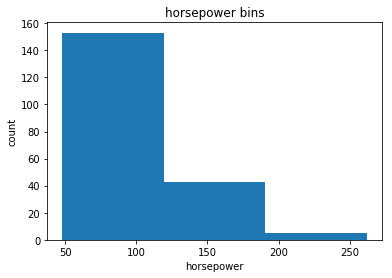

In [45]:
plt.hist(df["horsepower"], bins=3)

#set x/y labels and the plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### Converting categorical variable into numerical variables: 

#### 1) Get dummy variables for "fuel-type" column, megre it to the data frame and drop the "fuel-type" column:

In [46]:
dummy_variables1 = pd.get_dummies(df['fuel-type'])
dummy_variables1.rename(columns={'diesel':'disel', 'gas':'gas'}, inplace=True)
dummy_variables1.head()

,disel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variables1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

#### 2) Get dummy variables for "aspiration" column, megre it to the data frame and drop the "aspiration" column:

In [48]:
dummy_variables2 = pd.get_dummies(df['aspiration'])
dummy_variables2.rename(columns={'aspiration':'std', 'aspiration':'turbo'}, inplace=True)
dummy_variables2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [49]:
# merge data frame "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variables2], axis=1)

# drop original column "aspiration" from "df"
df.drop("aspiration", axis = 1, inplace=True)

### 7. Save the new CSV file as "clean_df.csv" and use the 'df.head()' method to check the first 10 rows in the dataframe

In [50]:
df.to_csv("clean_df.csv", index = False)

In [51]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower_binned,disel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,low,0,1,1,0


In [52]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower_binned', 'disel', 'gas', 'std', 'turbo'],
      dtype='object')

# THE END